In [32]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


In [33]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [34]:
df=my_dataset['train'].to_pandas()

In [35]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [36]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]

In [38]:
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

In [39]:
df_DA_US=df_DA_US.explode('job_skills')

In [40]:
df_DA_US_topskill=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [41]:
df_DA_US_topskill=df_DA_US_topskill.head(10).sort_values(by='median', ascending=False)

In [42]:
df_DA_US_toppay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

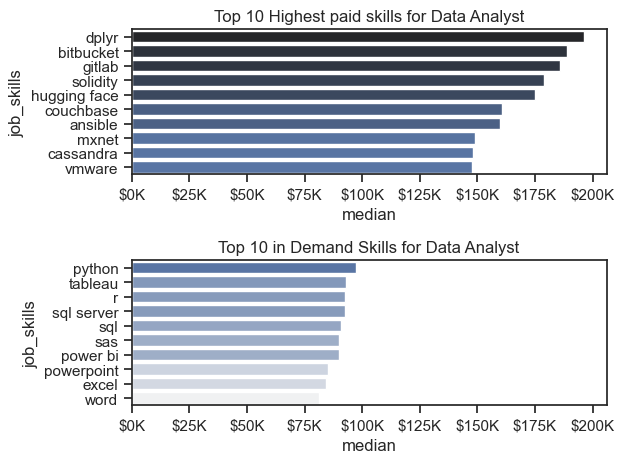

In [43]:
fig, ax=plt.subplots(2,1)
sns.set_theme(style='ticks')
##df_DA_US_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_US_toppay, x='median', y=df_DA_US_toppay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

ax[0].set_title('Top 10 Highest paid skills for Data Analyst')
ax[0].ylabel=''
ax[0].xlabel=''
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


##df_DA_US_topskill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

sns.barplot(data=df_DA_US_topskill, x='median', y=df_DA_US_topskill.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].ylabel=''
ax[1].xlabel='Median Salary in USD'
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()
